In [ ]:
# Importing Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings('ignore')

# Importing Machine Learning Library
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv('/content/Dataset-Unicauca-Version2-87Atts.csv')

In [ ]:
df.shape

(1048575, 87)

In [ ]:
df.head(7)

Flow.ID      Source.IP  Source.Port  \
0    172.19.1.46-10.200.7.7-52422-3128-6    172.19.1.46        52422   
1    172.19.1.46-10.200.7.7-52422-3128-6     10.200.7.7         3128   
2   10.200.7.217-50.31.185.39-38848-80-6   50.31.185.39           80   
3   10.200.7.217-50.31.185.39-38848-80-6   50.31.185.39           80   
4  192.168.72.43-10.200.7.7-55961-3128-6  192.168.72.43        55961   
5    172.19.1.56-10.200.7.6-50004-3128-6     10.200.7.6         3128   
6  192.168.72.43-10.200.7.7-55963-3128-6  192.168.72.43        55963   

  Destination.IP  Destination.Port  Protocol           Timestamp  \
0     10.200.7.7              3128         6  26/04/201711:11:17   
1    172.19.1.46             52422         6  26/04/201711:11:17   
2   10.200.7.217             38848         6  26/04/201711:11:17   
3   10.200.7.217             38848         6  26/04/201711:11:17   
4     10.200.7.7              3128         6  26/04/201711:11:17   
5    172.19.1.56             50004         6  26/04/201711:11:17   
6     10.200.7.7              3128         6  26/04/201711:11:17   

   Flow.Duration  Total.Fwd.Packets  Total.Backward.Packets  ...  Active.Std  \
0          45523                 22                      55  ...         0.0   
1              1                  2                       0  ...         0.0   
2              1                  3                       0  ...         0.0   
3            217                  1                       3  ...         0.0   
4          78068                  5                       0  ...         0.0   
5         105069                136                       0  ...         0.0   
6         104443                  5                       0  ...         0.0   

   Active.Max  Active.Min  Idle.Mean  Idle.Std  Idle.Max  Idle.Min   Label  \
0           0         0.0        0.0       0.0       0.0       0.0  BENIGN   
1           0         0.0        0.0       0.0       0.0       0.0  BENIGN   
2           0         0.0        0.0       0.0       0.0       0.0  BENIGN   
3           0         0.0        0.0       0.0       0.0       0.0  BENIGN   
4           0         0.0        0.0       0.0       0.0       0.0  BENIGN   
5           0         0.0        0.0       0.0       0.0       0.0  BENIGN   
6           0         0.0        0.0       0.0       0.0       0.0  BENIGN   

   L7Protocol  ProtocolName  
0         131    HTTP_PROXY  
1         131    HTTP_PROXY  
2           7          HTTP  
3           7          HTTP  
4         131    HTTP_PROXY  
5         131    HTTP_PROXY  
6         131    HTTP_PROXY  

[7 rows x 87 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 87 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Flow.ID                      1048575 non-null  object 
 1   Source.IP                    1048575 non-null  object 
 2   Source.Port                  1048575 non-null  int64  
 3   Destination.IP               1048575 non-null  object 
 4   Destination.Port             1048575 non-null  int64  
 5   Protocol                     1048575 non-null  int64  
 6   Timestamp                    1048575 non-null  object 
 7   Flow.Duration                1048575 non-null  int64  
 8   Total.Fwd.Packets            1048575 non-null  int64  
 9   Total.Backward.Packets       1048575 non-null  int64  
 10  Total.Length.of.Fwd.Packets  1048575 non-null  int64  
 11  Total.Length.of.Bwd.Packets  1048575 non-null  float64
 12  Fwd.Packet.Length.Max        1048575 non-n

In [ ]:
df.dtypes

Flow.ID              object
Source.IP            object
Source.Port           int64
Destination.IP       object
Destination.Port      int64
                     ...   
Idle.Max            float64
Idle.Min            float64
Label                object
L7Protocol            int64
ProtocolName         object
Length: 87, dtype: object

In [ ]:
df.describe().T

count          mean           std  min     25%  \
Source.Port        1048575.0  3.569082e+04  2.267147e+04  0.0  3128.0   
Destination.Port   1048575.0  1.291848e+04  2.116656e+04  0.0   443.0   
Protocol           1048575.0  6.005119e+00  3.248193e-01  0.0     6.0   
Flow.Duration      1048575.0  2.112849e+07  3.711712e+07  1.0   564.0   
Total.Fwd.Packets  1048575.0  5.465246e+01  9.892436e+02  1.0     2.0   
...                      ...           ...           ...  ...     ...   
Idle.Mean          1048575.0  7.093360e+06  1.598250e+07  0.0     0.0   
Idle.Std           1048575.0  1.115743e+06  4.398582e+06  0.0     0.0   
Idle.Max           1048575.0  8.076663e+06  1.764365e+07  0.0     0.0   
Idle.Min           1048575.0  6.058889e+06  1.497405e+07  0.0     0.0   
L7Protocol         1048575.0  9.611647e+01  5.484653e+01  5.0    70.0   

                        50%         75%           max  
Source.Port         46984.0     53060.0  6.553400e+04  
Destination.Port     3128.0      3128.0  6.553400e+04  
Protocol                6.0         6.0  1.700000e+01  
Flow.Duration      313310.0  19923955.5  1.200000e+08  
Total.Fwd.Packets       5.0        15.0  3.286950e+05  
...                     ...         ...           ...  
Idle.Mean               0.0         0.0  1.200000e+08  
Idle.Std                0.0         0.0  7.516046e+07  
Idle.Max                0.0         0.0  1.200000e+08  
Idle.Min                0.0         0.0  1.200000e+08  
L7Protocol            126.0       130.0  2.220000e+02  

[81 rows x 8 columns]

In [ ]:
df.duplicated().sum()

2514

In [ ]:
df.nunique()

Flow.ID             442483
Source.IP             2893
Source.Port          38198
Destination.IP       11488
Destination.Port     25254
                     ...  
Idle.Max            189909
Idle.Min            207247
Label                    1
L7Protocol              60
ProtocolName            60
Length: 87, dtype: int64

In [ ]:
columns_to_count=df.columns
for column in columns_to_count:
    print(df[column].value_counts())
    print('-----------------------')

Flow.ID
192.168.10.58-10.200.7.4-50555-3128-6     199
192.168.180.14-10.200.7.8-52792-3128-6    192
192.168.180.14-10.200.7.5-51613-3128-6    176
192.168.180.16-10.200.7.7-55146-3128-6    127
172.16.255.183-10.200.7.4-53-52931-17     115
                                         ... 
179.1.4.230-10.200.7.199-443-45526-6        1
190.90.221.34-10.200.7.199-80-36290-6       1
192.168.42.72-10.200.7.7-63924-3128-6       1
192.168.42.72-10.200.7.7-63929-3128-6       1
192.168.180.14-10.200.7.5-34478-3128-6      1
Name: count, Length: 442483, dtype: int64
-----------------------
Source.IP
10.200.7.217      93634
10.200.7.218      79628
10.200.7.199      61417
10.200.7.195      60937
10.200.7.194      59448
                  ...  
34.204.127.166        1
38.106.10.133         1
213.171.205.88        1
208.92.55.74          1
192.168.127.59        1
Name: count, Length: 2893, dtype: int64
-----------------------
Source.Port
3128     220283
443       36293
80         4040
0           506
49472 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()


object_str_cols = df.select_dtypes(include=['object']).columns


# Apply label encoding to these columns
for col in object_str_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Check the updated data types to confirm encoding
object_info = df.info()


(object_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 87 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Flow.ID                      1048575 non-null  int64  
 1   Source.IP                    1048575 non-null  int64  
 2   Source.Port                  1048575 non-null  int64  
 3   Destination.IP               1048575 non-null  int64  
 4   Destination.Port             1048575 non-null  int64  
 5   Protocol                     1048575 non-null  int64  
 6   Timestamp                    1048575 non-null  int64  
 7   Flow.Duration                1048575 non-null  int64  
 8   Total.Fwd.Packets            1048575 non-null  int64  
 9   Total.Backward.Packets       1048575 non-null  int64  
 10  Total.Length.of.Fwd.Packets  1048575 non-null  int64  
 11  Total.Length.of.Bwd.Packets  1048575 non-null  float64
 12  Fwd.Packet.Length.Max        1048575 non-n

In [ ]:
corr_matrix=df.corr()
corr_matrix

Flow.ID  Source.IP  Source.Port  Destination.IP  \
Flow.ID           1.000000   0.370161    -0.096088       -0.252922   
Source.IP         0.370161   1.000000     0.134280       -0.653622   
Source.Port      -0.096088   0.134280     1.000000       -0.086449   
Destination.IP   -0.252922  -0.653622    -0.086449        1.000000   
Destination.Port  0.119107  -0.140753    -0.769493        0.070311   
...                    ...        ...          ...             ...   
Idle.Max          0.013277   0.182660     0.070559       -0.155085   
Idle.Min          0.007764   0.162958     0.063377       -0.132677   
Label                  NaN        NaN          NaN             NaN   
L7Protocol        0.019460   0.386882     0.429562       -0.323278   
ProtocolName     -0.116642  -0.099219     0.197442        0.131246   

                  Destination.Port  Protocol  Timestamp  Flow.Duration  \
Flow.ID                   0.119107 -0.008127  -0.018494      -0.018598   
Source.IP                -0.140753 -0.009855  -0.062627       0.199374   
Source.Port              -0.769493  0.026069  -0.044533       0.051941   
Destination.IP            0.070311  0.004182   0.061540      -0.144529   
Destination.Port          1.000000 -0.004621   0.026882       0.012074   
...                            ...       ...        ...            ...   
Idle.Max                 -0.009816 -0.002502   0.000602       0.801117   
Idle.Min                 -0.010633 -0.003808  -0.003207       0.669907   
Label                          NaN       NaN        NaN            NaN   
L7Protocol               -0.447066 -0.018084  -0.024100       0.216914   
ProtocolName             -0.201038 -0.012718   0.027547      -0.036276   

                  Total.Fwd.Packets  Total.Backward.Packets  ...  Active.Std  \
Flow.ID                    0.002059                0.001444  ...   -0.011751   
Source.IP                  0.004592                0.011283  ...    0.025407   
Source.Port               -0.011590                0.013917  ...    0.008209   
Destination.IP            -0.008085               -0.013477  ...   -0.034198   
Destination.Port           0.015918               -0.011237  ...    0.003260   
...                             ...                     ...  ...         ...   
Idle.Max                   0.001731                0.004606  ...    0.167480   
Idle.Min                  -0.002646                0.000010  ...    0.068449   
Label                           NaN                     NaN  ...         NaN   
L7Protocol                 0.011387                0.016252  ...    0.052017   
ProtocolName               0.025226                0.034956  ...    0.018089   

                  Active.Max  Active.Min  Idle.Mean  Idle.Std  Idle.Max  \
Flow.ID            -0.028199   -0.030642   0.012806  0.017282  0.013277   
Source.IP           0.008143   -0.016090   0.180959  0.099125  0.182660   
Source.Port         0.013294    0.017287   0.069584  0.047339  0.070559   
Destination.IP     -0.028168   -0.005542  -0.150630 -0.097223 -0.155085   
Destination.Port   -0.006286   -0.019375  -0.010051 -0.011081 -0.009816   
...                      ...         ...        ...       ...       ...   
Idle.Max            0.168965    0.078492   0.978849  0.537829  1.000000   
Idle.Min            0.098313    0.086703   0.970249  0.141145  0.906427   
Label                    NaN         NaN        NaN       NaN       NaN   
L7Protocol          0.057806    0.028683   0.180985  0.105989  0.186590   
ProtocolName        0.039277    0.037112  -0.037752 -0.015458 -0.035011   

                  Idle.Min  Label  L7Protocol  ProtocolName  
Flow.ID           0.007764    NaN    0.019460     -0.116642  
Source.IP         0.162958    NaN    0.386882     -0.099219  
Source.Port       0.063377    NaN    0.429562      0.197442  
Destination.IP   -0.132677    NaN   -0.323278      0.131246  
Destination.Port -0.010633    NaN   -0.447066     -0.201038  
...                    ...    ...         ...          

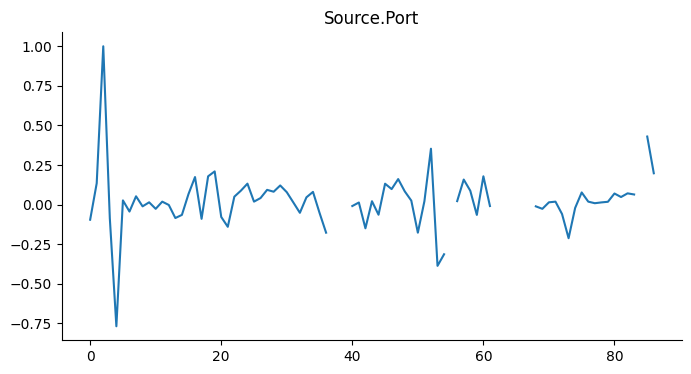

In [ ]:
from matplotlib import pyplot as plt
_df_14['Source.Port'].plot(kind='line', figsize=(8, 4), title='Source.Port')
plt.gca().spines[['top', 'right']].set_visible(False)

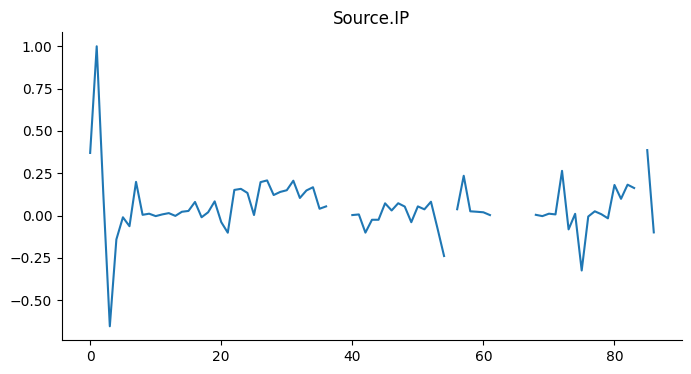

In [ ]:
from matplotlib import pyplot as plt
_df_13['Source.IP'].plot(kind='line', figsize=(8, 4), title='Source.IP')
plt.gca().spines[['top', 'right']].set_visible(False)

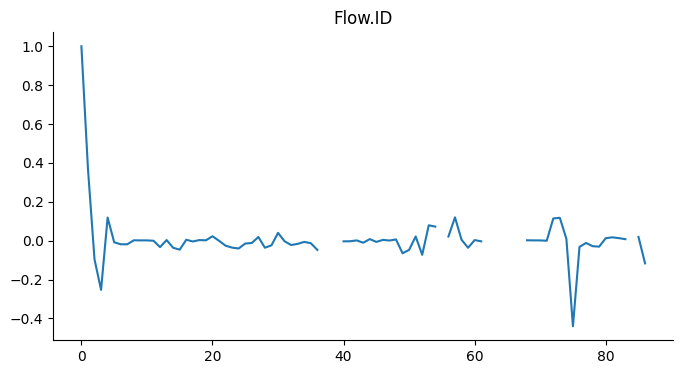

In [ ]:
from matplotlib import pyplot as plt
_df_12['Flow.ID'].plot(kind='line', figsize=(8, 4), title='Flow.ID')
plt.gca().spines[['top', 'right']].set_visible(False)

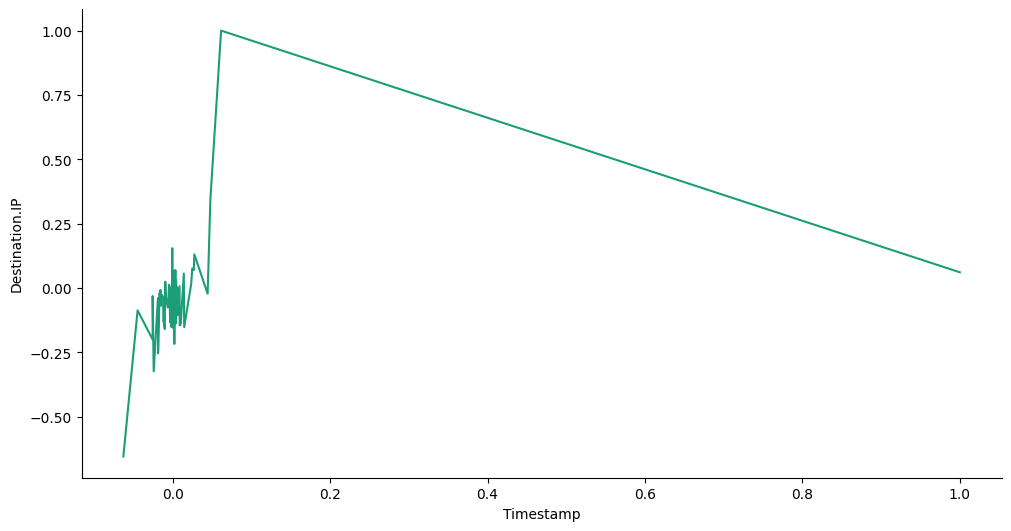

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Destination.IP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Destination.IP')

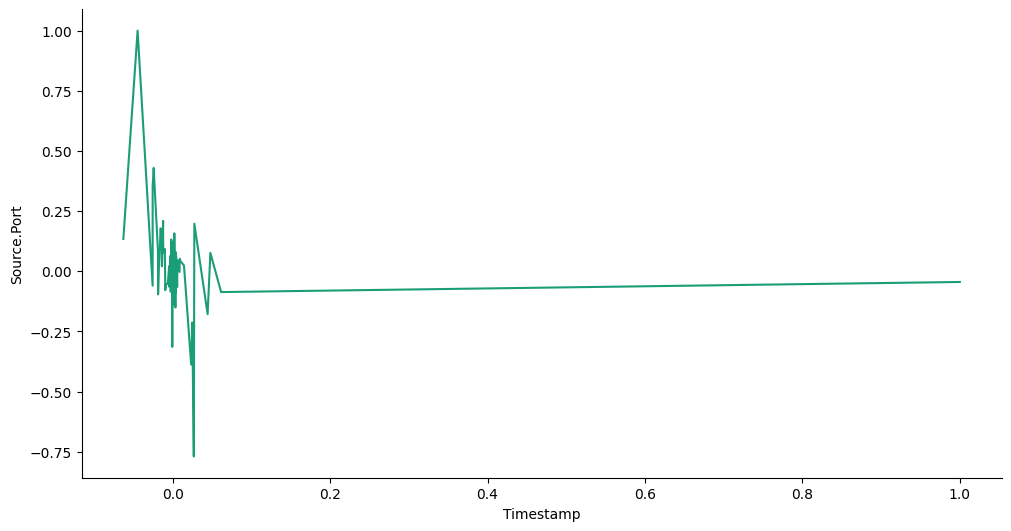

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Source.Port']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Source.Port')

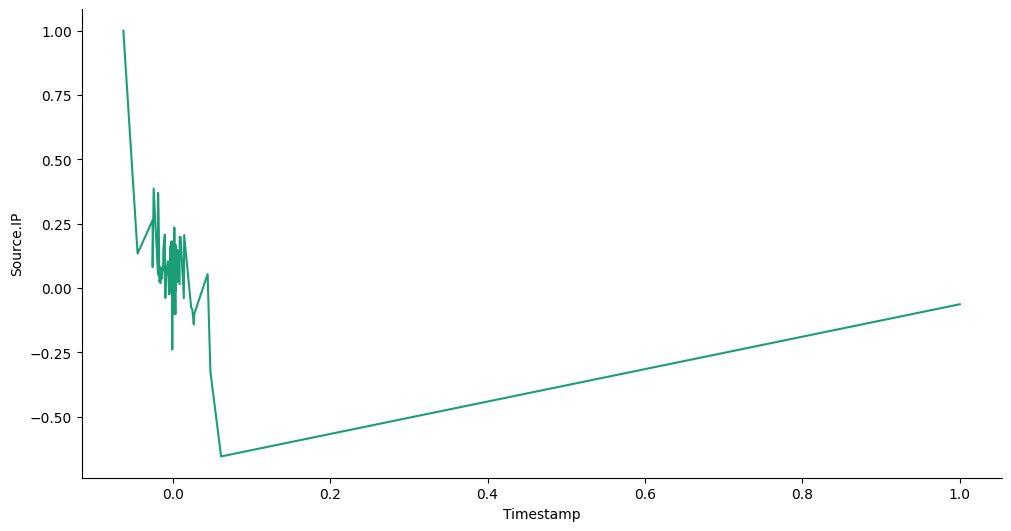

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Source.IP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Source.IP')

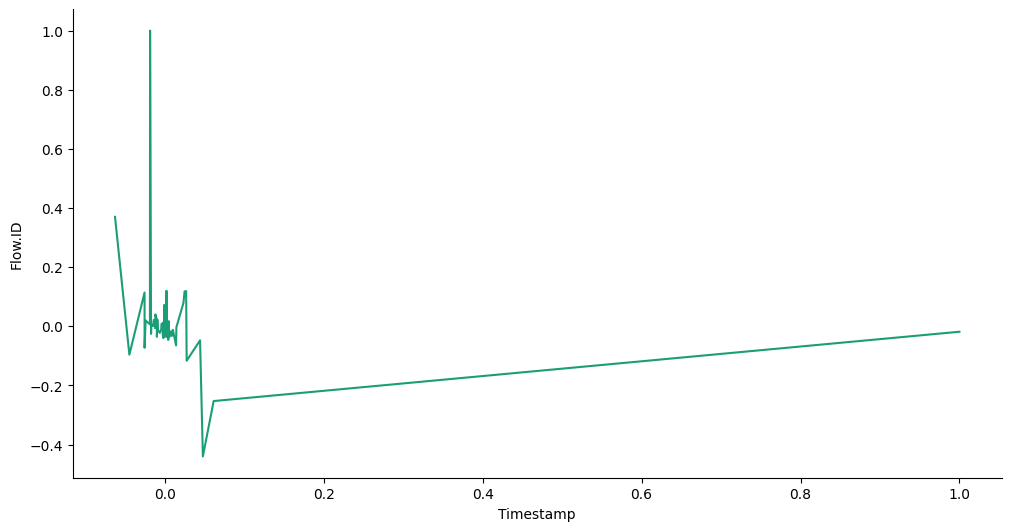

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Flow.ID']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Flow.ID')

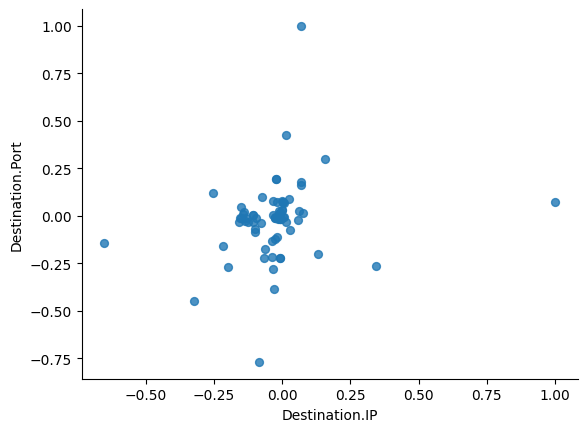

In [ ]:
from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Destination.IP', y='Destination.Port', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

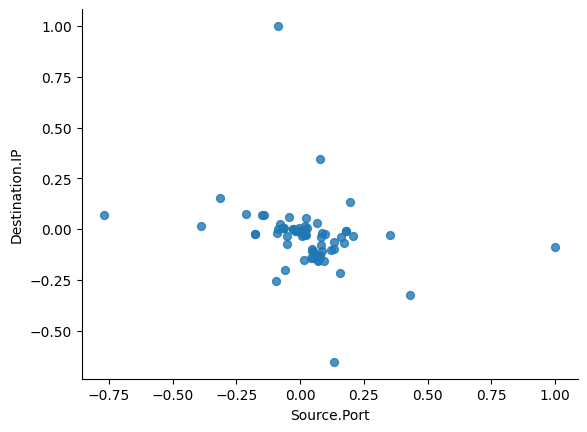

In [ ]:
from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Source.Port', y='Destination.IP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

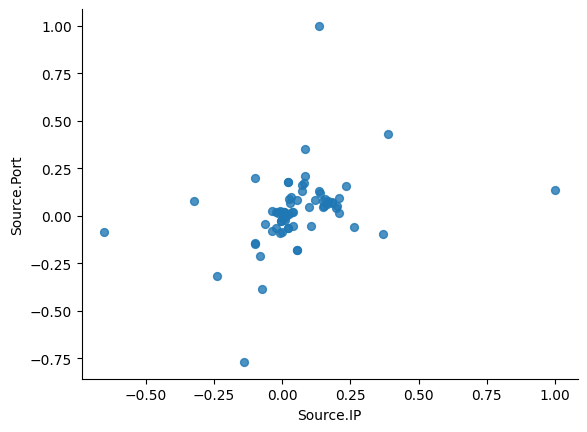

In [ ]:
from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Source.IP', y='Source.Port', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

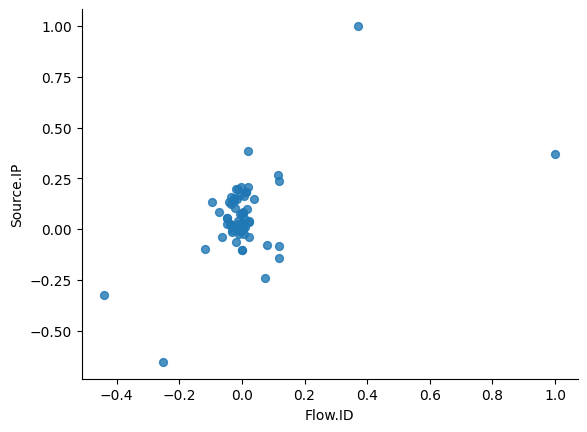

In [ ]:
from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Flow.ID', y='Source.IP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

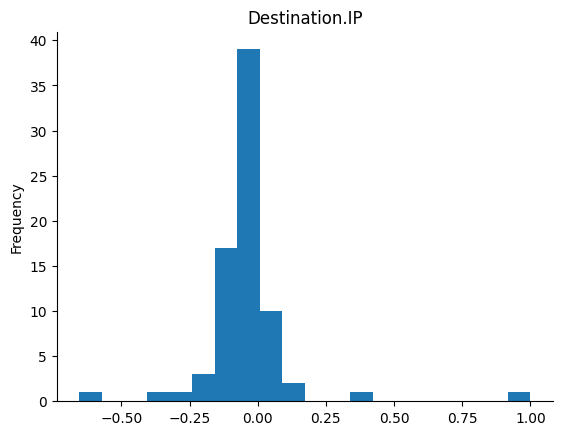

In [ ]:
from matplotlib import pyplot as plt
_df_3['Destination.IP'].plot(kind='hist', bins=20, title='Destination.IP')
plt.gca().spines[['top', 'right',]].set_visible(False)

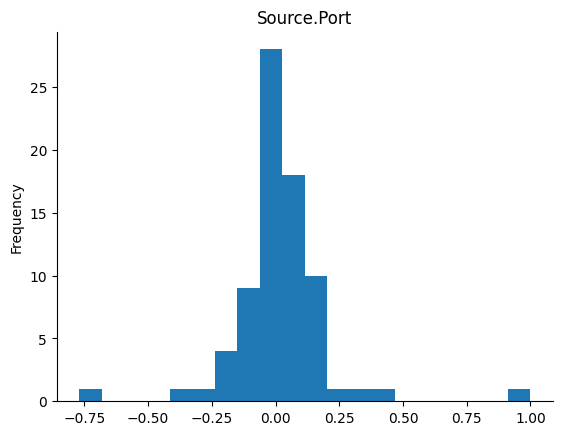

In [ ]:
from matplotlib import pyplot as plt
_df_2['Source.Port'].plot(kind='hist', bins=20, title='Source.Port')
plt.gca().spines[['top', 'right',]].set_visible(False)

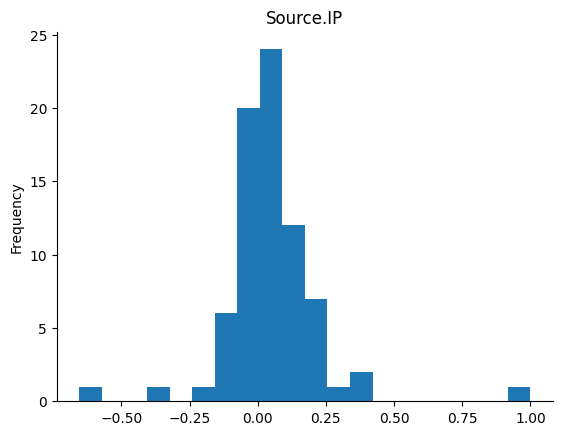

In [ ]:
from matplotlib import pyplot as plt
_df_1['Source.IP'].plot(kind='hist', bins=20, title='Source.IP')
plt.gca().spines[['top', 'right',]].set_visible(False)

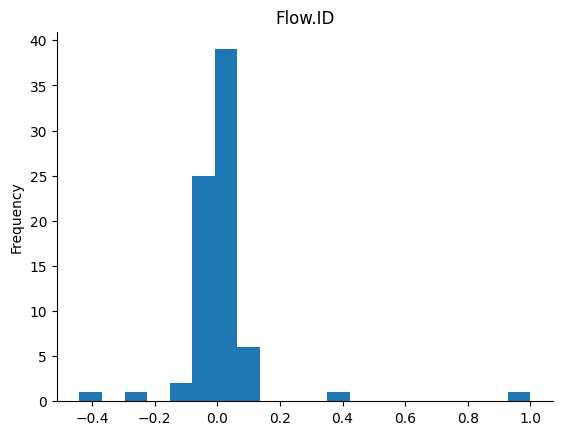

In [ ]:
from matplotlib import pyplot as plt
_df_0['Flow.ID'].plot(kind='hist', bins=20, title='Flow.ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
target_corr = corr_matrix['L7Protocol'].sort_values(ascending=False)
print("Correlation with target:\n", target_corr)

Correlation with target:
 L7Protocol              1.000000
Source.Port             0.429562
Source.IP               0.386882
Flow.Duration           0.216914
PSH.Flag.Count          0.216180
                          ...   
Fwd.Avg.Bulk.Rate            NaN
Bwd.Avg.Bytes.Bulk           NaN
Bwd.Avg.Packets.Bulk         NaN
Bwd.Avg.Bulk.Rate            NaN
Label                        NaN
Name: L7Protocol, Length: 87, dtype: float64


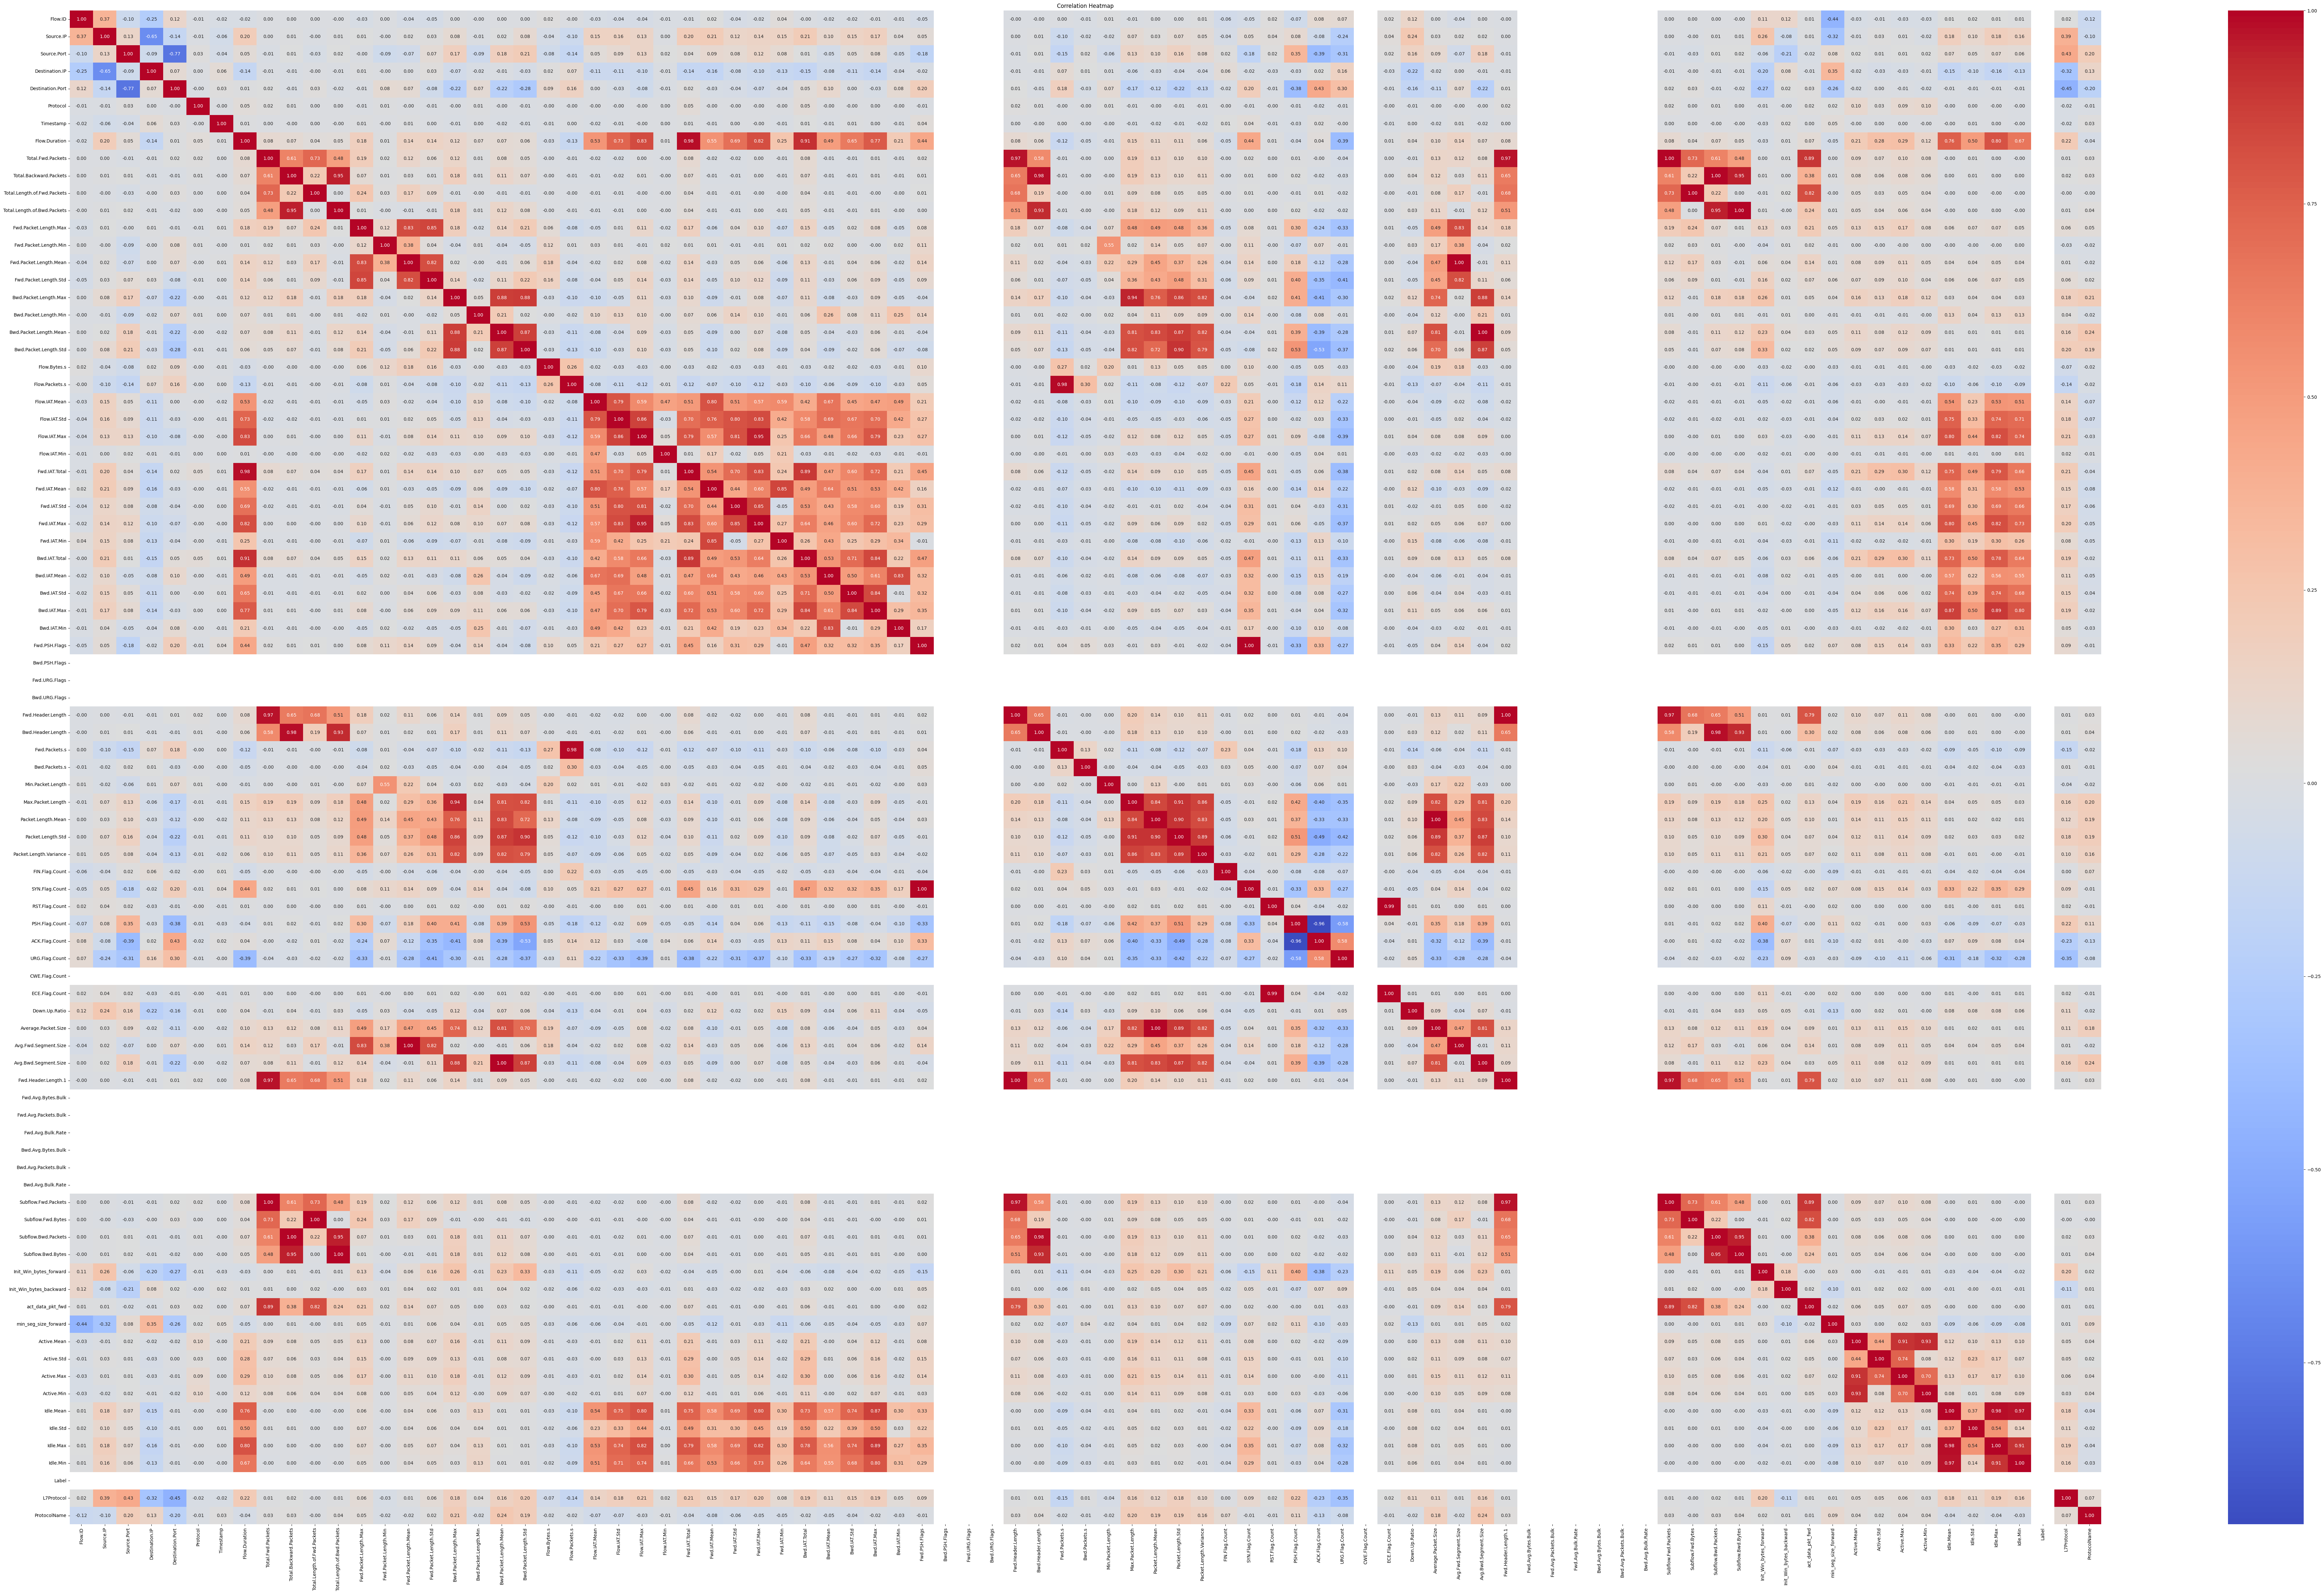

In [ ]:
plt.figure(figsize=(100, 60))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Define the list of columns to drop.
columns_to_drop = [
    'Fwd.Packet.Length.Max','Protocol','Timestamp', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Std',
    'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Std',
    'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Std', 'Flow.IAT.Max',
    'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
    'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Std', 'Bwd.IAT.Max',
    'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Bwd.PSH.Flags', 'Fwd.URG.Flags',
    'Bwd.URG.Flags', 'Min.Packet.Length', 'Max.Packet.Length',
    'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count',
    'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', 'URG.Flag.Count',
    'CWE.Flag.Count', 'ECE.Flag.Count', 'Down.Up.Ratio', 'Subflow.Fwd.Packets',
    'Subflow.Fwd.Bytes', 'Subflow.Bwd.Packets', 'Subflow.Bwd.Bytes',
    'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd',
    'min_seg_size_forward', 'Active.Std', 'Active.Max', 'Active.Min',
    'Idle.Std', 'Idle.Max', 'Idle.Min', 'Label','Fwd.Avg.Bytes.Bulk','Fwd.Avg.Packets.Bulk','Fwd.Avg.Bulk.Rate','Bwd.Avg.Bytes.Bulk','Bwd.Avg.Packets.Bulk','Bwd.Avg.Bulk.Rate','Flow.IAT.Mean'
]

# Drop the columns.
df1 = df.drop(columns=columns_to_drop, axis=1)

In [ ]:
df1

Flow.ID  Source.IP  Source.Port  Destination.IP  Destination.Port  \
0         125280        492        52422              41              3128   
1         125280         34         3128            2598             52422   
2          68641       2262           80              36             38848   
3          68641       2262           80              36             38848   
4         369237       1645        55961              41              3128   
...          ...        ...          ...             ...               ...   
1048570   390596         32         3128            4560             59240   
1048571   340410         32         3128            4340             62632   
1048572   402798         32         3128            4607             52166   
1048573   276509         32         3128            4044             34478   
1048574   276563         32         3128            4044             50033   

         Flow.Duration  Total.Fwd.Packets  Total.Backward.Packets  \
0                45523                 22                      55   
1                    1                  2                       0   
2                    1                  3                       0   
3                  217                  1                       3   
4                78068                  5                       0   
...                ...                ...                     ...   
1048570              1                  2                       0   
1048571       74700026                 12                       1   
1048572       76789744                 19                       2   
1048573         535002                  2                       0   
1048574         511035                  2                       0   

         Total.Length.of.Fwd.Packets  Total.Length.of.Bwd.Packets  ...  \
0                                132                     110414.0  ...   
1                                 12                          0.0  ...   
2                                674                          0.0  ...   
3                                  0                          0.0  ...   
4                               1076                          0.0  ...   
...                              ...                          ...  ...   
1048570                           12                          0.0  ...   
1048571                           12                          6.0  ...   
1048572                         2624                       1834.0  ...   
1048573                            0                          0.0  ...   
1048574                            0                          0.0  ...   

         Packet.Length.Mean  ACK.Flag.Count  Average.Packet.Size  \
0               1417.333333               1          1435.740260   
1                  6.000000               1             9.000000   
2                252.750000               1           337.000000   
3                  0.000000               1             0.000000   
4                267.500000               1           321.000000   
...                     ...             ...                  ...   
1048570            6.000000               1             9.000000   
1048571            1.714286               1             1.846154   
1048572          214.318182               1           224.523809   
1048573            0.000000               1             0.000000   
1048574            0.000000               1             0.000000   

         Avg.Fwd.Segment.Size  Avg.Bwd.Segment.Size  Fwd.Header.Length.1  \
0                    6.000000           2007.527273                  440   
1                    6.000000              0.000000                   40   
2                  224.666667              0.000000                   96   
3                    0.000000              0.000000                   32   
4                  215.200000              0.000000                  100   
...                       ...                   ...                  ...   
10485

In [ ]:
corr_matrix1=df1.corr()
corr_matrix1

Flow.ID  Source.IP  Source.Port  Destination.IP  \
Flow.ID                      1.000000   0.370161    -0.096088       -0.252922   
Source.IP                    0.370161   1.000000     0.134280       -0.653622   
Source.Port                 -0.096088   0.134280     1.000000       -0.086449   
Destination.IP              -0.252922  -0.653622    -0.086449        1.000000   
Destination.Port             0.119107  -0.140753    -0.769493        0.070311   
Flow.Duration               -0.018598   0.199374     0.051941       -0.144529   
Total.Fwd.Packets            0.002059   0.004592    -0.011590       -0.008085   
Total.Backward.Packets       0.001444   0.011283     0.013917       -0.013477   
Total.Length.of.Fwd.Packets  0.001559  -0.003013    -0.027251       -0.000457   
Total.Length.of.Bwd.Packets -0.000297   0.007042     0.018105       -0.009359   
Fwd.Packet.Length.Mean      -0.036468   0.022703    -0.065675        0.003072   
Bwd.Packet.Length.Mean       0.003141   0.019567     0.178346       -0.007487   
Fwd.IAT.Mean                 0.019087   0.207843     0.092623       -0.158876   
Bwd.IAT.Mean                -0.022241   0.104127    -0.052406       -0.075096   
Fwd.Header.Length           -0.003407   0.003184    -0.009582       -0.007217   
Bwd.Header.Length           -0.002913   0.006834     0.012774       -0.009955   
Fwd.Packets.s                0.001393  -0.100548    -0.150307        0.069099   
Bwd.Packets.s               -0.010509  -0.024598     0.020739        0.013023   
Packet.Length.Mean           0.004123   0.030324     0.097490       -0.025722   
ACK.Flag.Count               0.079205  -0.075730    -0.387619        0.015368   
Average.Packet.Size          0.004989   0.025400     0.087070       -0.020630   
Avg.Fwd.Segment.Size        -0.036468   0.022703    -0.065675        0.003072   
Avg.Bwd.Segment.Size         0.003141   0.019567     0.178346       -0.007487   
Fwd.Header.Length.1         -0.003407   0.003184    -0.009582       -0.007217   
Active.Mean                 -0.031880  -0.005376     0.018197       -0.017463   
Idle.Mean                    0.012806   0.180959     0.069584       -0.150630   
L7Protocol                   0.019460   0.386882     0.429562       -0.323278   
ProtocolName                -0.116642  -0.099219     0.197442        0.131246   

                             Destination.Port  Flow.Duration  \
Flow.ID                              0.119107      -0.018598   
Source.IP                           -0.140753       0.199374   
Source.Port                         -0.769493       0.051941   
Destination.IP                       0.070311      -0.144529   
Destination.Port                     1.000000       0.012074   
Flow.Duration                        0.012074       1.000000   
Total.Fwd.Packets                    0.015918       0.082231   
Total.Backward.Packets              -0.011237       0.066706   
Total.Length.of.Fwd.Packets          0.032036       0.039796   
Total.Length.of.Bwd.Packets         -0.016362       0.046688   
Fwd.Packet.Length.Mean               0.072639       0.143206   
Bwd.Packet.Length.Mean              -0.224294       0.067543   
Fwd.IAT.Mean                        -0.032149       0.546081   
Bwd.IAT.Mean                         0.099017       0.492793   
Fwd.Header.Length                    0.012799       0.083801   
Bwd.Header.Length                   -0.011365       0.064616   
Fwd.Packets.s                        0.177028      -0.121356   
Bwd.Packets.s                       -0.030528      -0.048117   
Packet.Length.Mean                  -0.123584       0.105275   
ACK.Flag.Count                       0.427565       0.040901   
Average.Packet.Size                 -0.112399       0.096412   
Avg.Fwd.Segment.Size                 0.072639       0.143206   
Avg.Bwd.Segment.Size                -0.224294       0.067543   
Fwd.Header.Length.1                  0.012799       0.083801   
Active.Mean                         -0.015885       0.210120   
Idle.Mean       

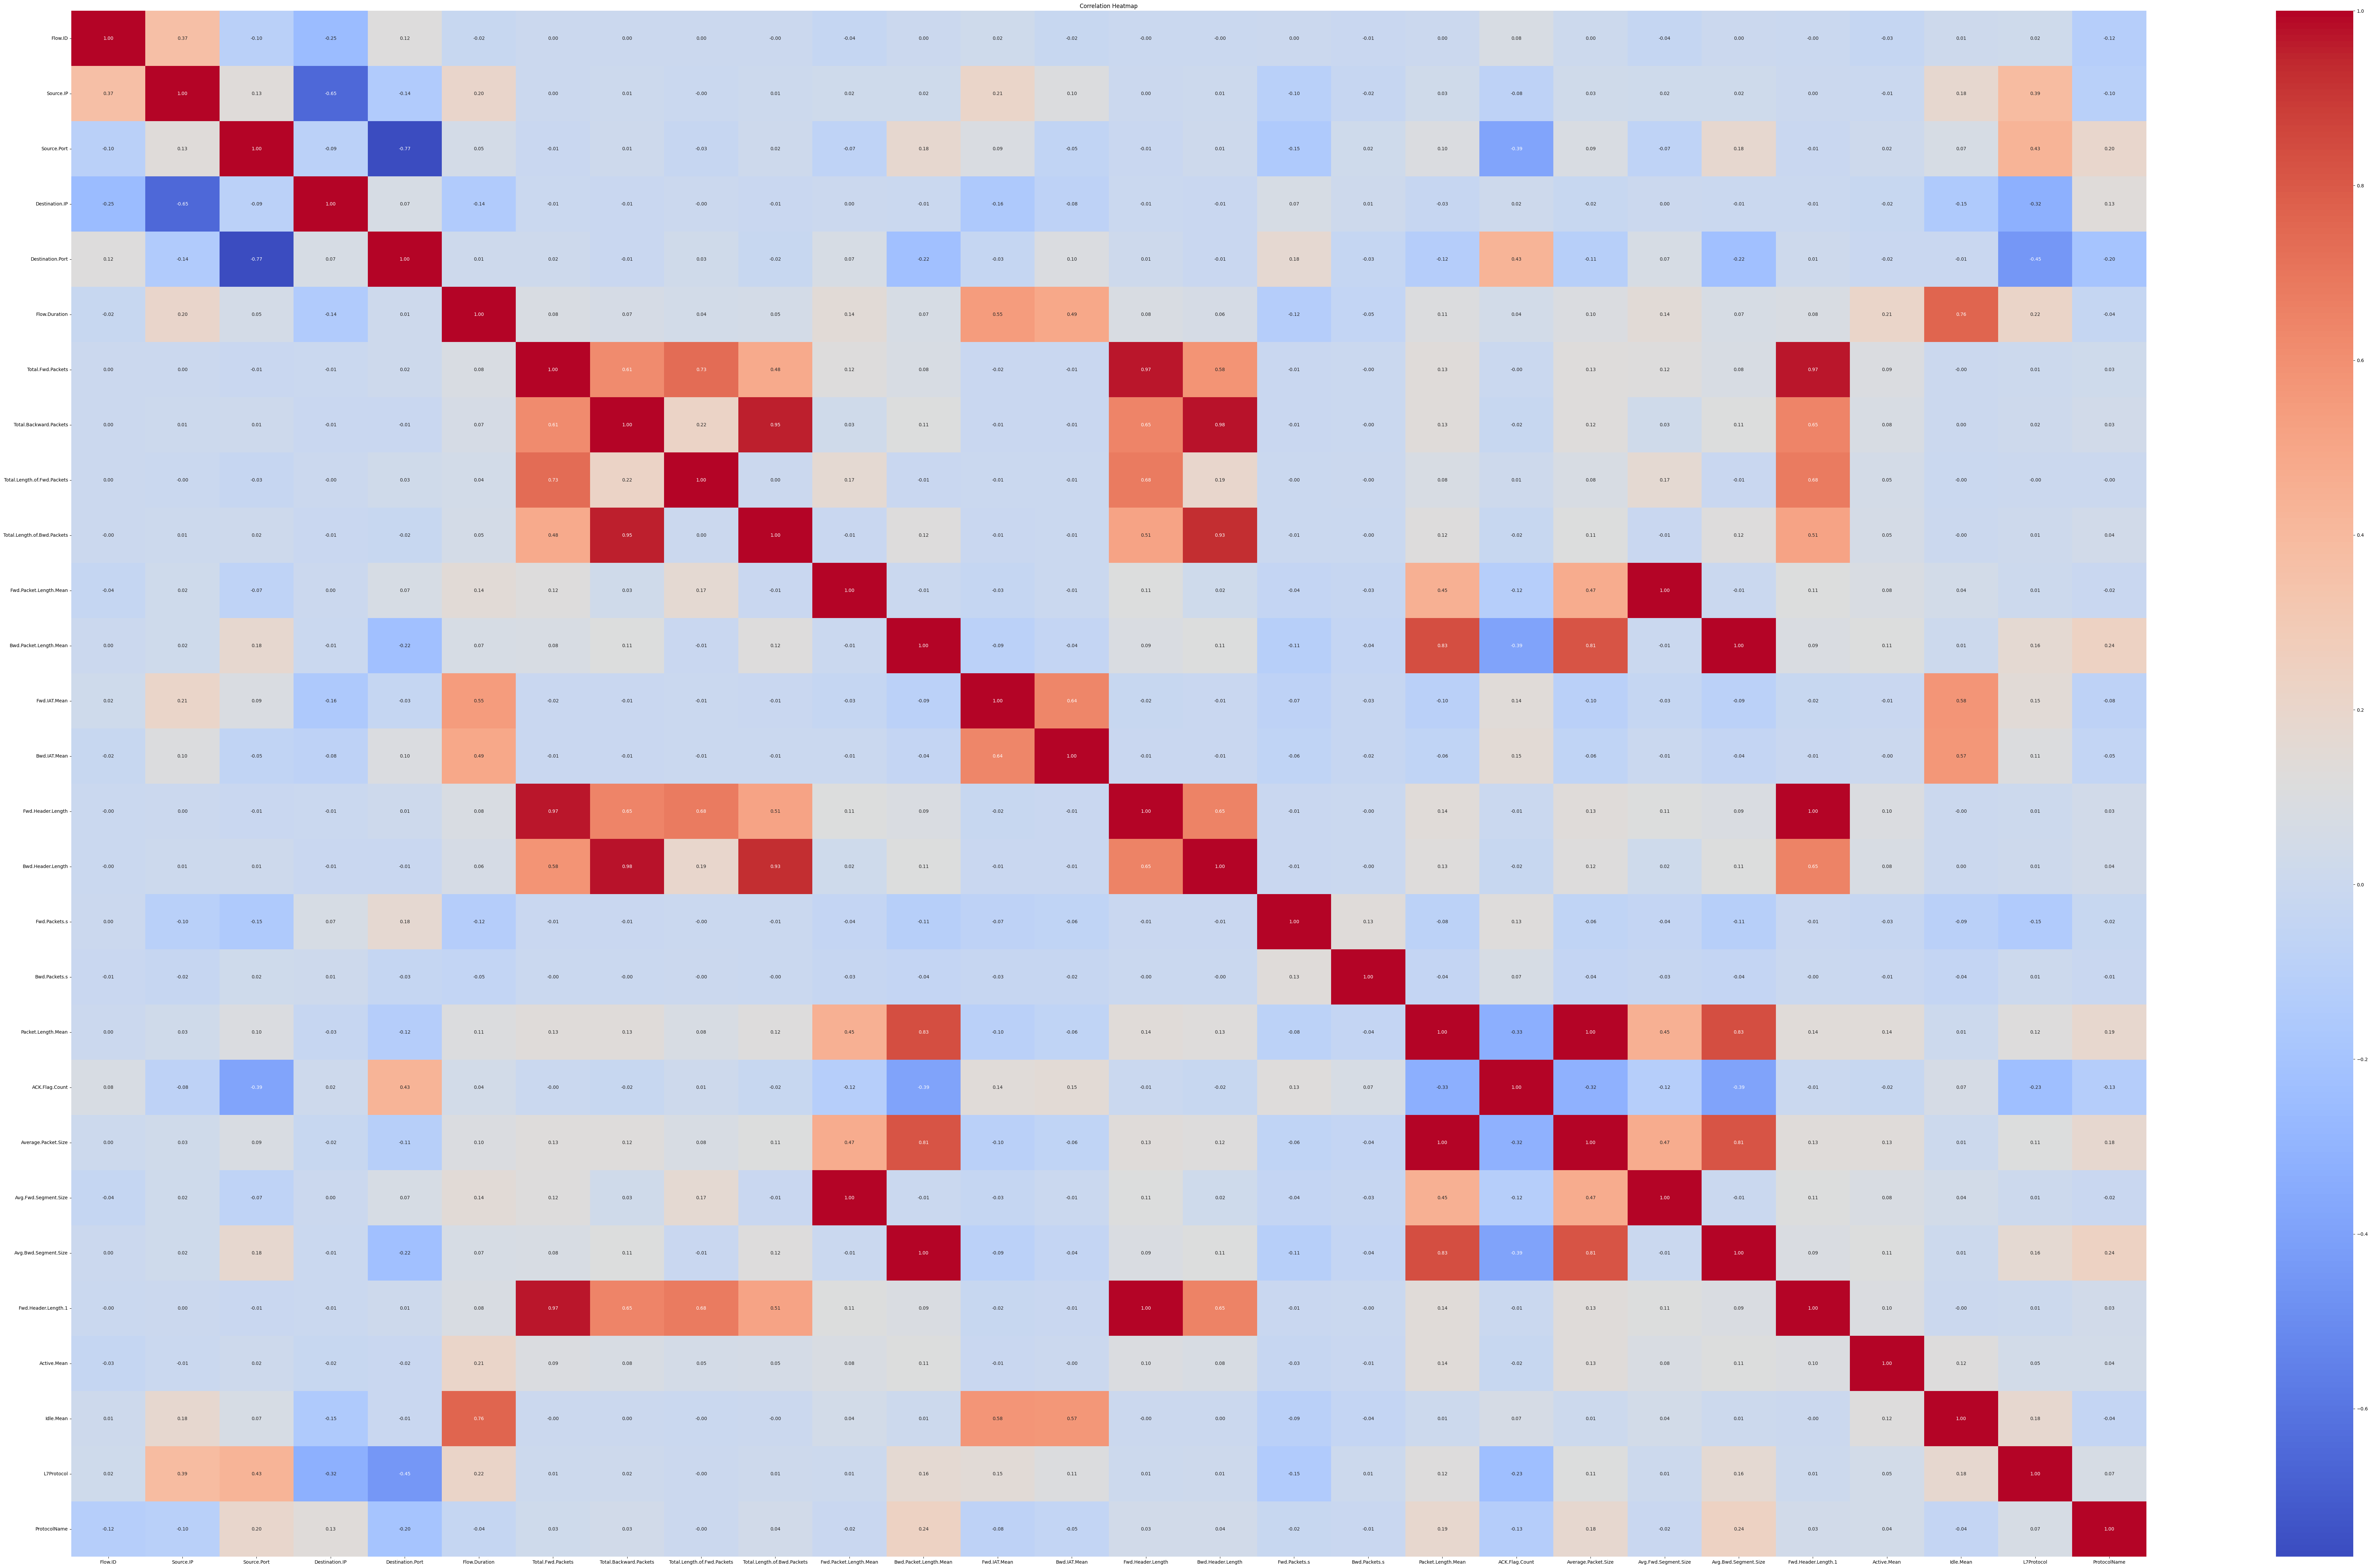

In [ ]:
plt.figure(figsize=(100, 60))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
target_corr1 = corr_matrix1['L7Protocol'].sort_values(ascending=False)
print("Correlation with target:\n", target_corr1)

Correlation with target:
 L7Protocol                     1.000000
Source.Port                    0.429562
Source.IP                      0.386882
Flow.Duration                  0.216914
Idle.Mean                      0.180985
Bwd.Packet.Length.Mean         0.164171
Avg.Bwd.Segment.Size           0.164171
Fwd.IAT.Mean                   0.149268
Packet.Length.Mean             0.118656
Average.Packet.Size            0.108601
Bwd.IAT.Mean                   0.107060
ProtocolName                   0.072824
Active.Mean                    0.045130
Flow.ID                        0.019460
Total.Backward.Packets         0.016252
Bwd.Header.Length              0.014280
Total.Length.of.Bwd.Packets    0.012629
Total.Fwd.Packets              0.011387
Fwd.Header.Length.1            0.011312
Fwd.Header.Length              0.011312
Bwd.Packets.s                  0.010441
Fwd.Packet.Length.Mean         0.007576
Avg.Fwd.Segment.Size           0.007576
Total.Length.of.Fwd.Packets   -0.001978
Fwd.Packets.s 

In [ ]:
columns_to_drop = [
    'Fwd.Packet.Length.Max','Protocol','Timestamp', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Std',
    'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Std',
    'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Std', 'Flow.IAT.Max',
    'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
    'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Std', 'Bwd.IAT.Max',
    'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Bwd.PSH.Flags', 'Fwd.URG.Flags',
    'Bwd.URG.Flags', 'Min.Packet.Length', 'Max.Packet.Length',
    'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count',
    'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', 'URG.Flag.Count',
    'CWE.Flag.Count', 'ECE.Flag.Count', 'Down.Up.Ratio', 'Subflow.Fwd.Packets',
    'Subflow.Fwd.Bytes', 'Subflow.Bwd.Packets', 'Subflow.Bwd.Bytes',
    'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd',
    'min_seg_size_forward', 'Active.Std', 'Active.Max', 'Active.Min',
    'Idle.Std', 'Idle.Max', 'Idle.Min', 'Label','Fwd.Avg.Bytes.Bulk','Fwd.Avg.Packets.Bulk','Fwd.Avg.Bulk.Rate','Bwd.Avg.Bytes.Bulk','Bwd.Avg.Packets.Bulk','Bwd.Avg.Bulk.Rate','Flow.IAT.Mean'
]

# Drop the columns.
df1 = df.drop(columns=columns_to_drop, axis=1)

# Apply outlier handling to df1
outliers_cols = df1.columns  # Apply to all columns in df1

for col in outliers_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR

    # Replace outliers with fences instead of removing them
    df1[col] = np.clip(df1[col], Lower_Fence, Upper_Fence)

<Figure size 800x500 with 0 Axes>

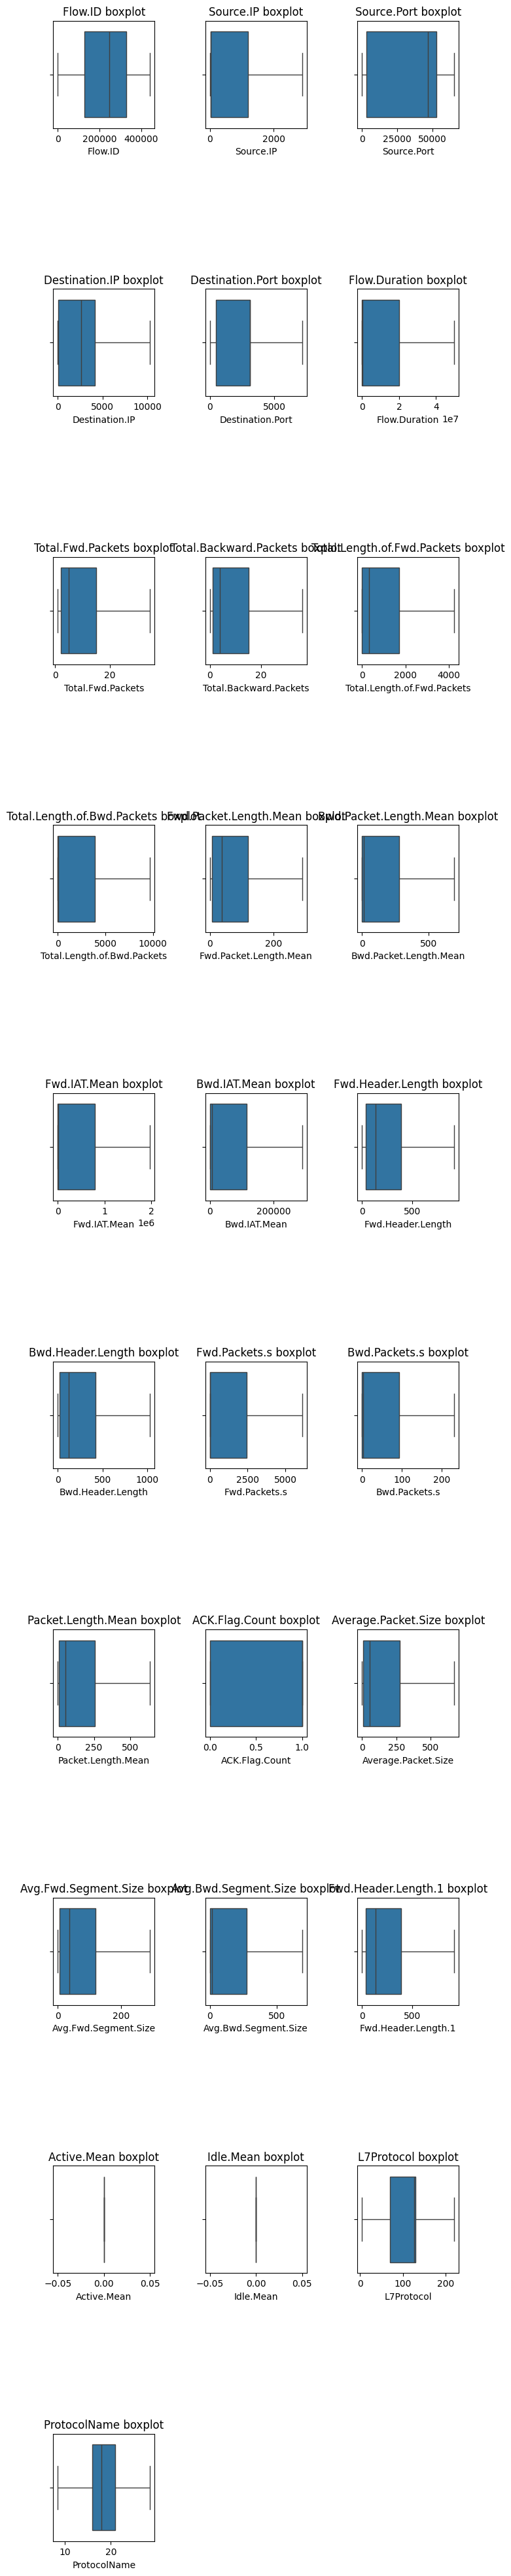

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
# Plot boxplots
plt.figure(figsize=(8, 5))

# Calculate the number of rows and columns for the subplots
num_cols = df1.shape[1]
num_rows = math.ceil(num_cols / 3)

# Adjust figsize based on the number of rows for better visibility
plt.figure(figsize=(8, 5 * num_rows))

for i, col in enumerate(df1):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(df1[col], orient="h")
    plt.title(f"{col} boxplot")

plt.subplots_adjust(hspace=1.5, wspace=0.5)
plt.show()

### Test And Train:

In [ ]:
y=df1[['L7Protocol']]
x=df1.drop('L7Protocol',axis=1)
scaler = StandardScaler()
x = scaler.fit_transform(x)

label_encoder = LabelEncoder()

# Fit the encoder to your categorical data and transform it
y = label_encoder.fit_transform(y)

# Get the mapping of labels to original values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Label Mapping:")
for value, label in label_mapping.items():
    print(f"{value} -> {label}")

ncategories = len(df1['L7Protocol'].unique())
print(ncategories)

Label Mapping:
5 -> 0
7 -> 1
9 -> 2
11 -> 3
36 -> 4
40 -> 5
51 -> 6
60 -> 7
64 -> 8
67 -> 9
68 -> 10
69 -> 11
70 -> 12
81 -> 13
91 -> 14
92 -> 15
114 -> 16
119 -> 17
120 -> 18
121 -> 19
122 -> 20
123 -> 21
124 -> 22
125 -> 23
126 -> 24
130 -> 25
131 -> 26
132 -> 27
133 -> 28
135 -> 29
140 -> 30
142 -> 31
143 -> 32
145 -> 33
147 -> 34
148 -> 35
153 -> 36
156 -> 37
159 -> 38
163 -> 39
164 -> 40
167 -> 41
169 -> 42
170 -> 43
175 -> 44
176 -> 45
178 -> 46
179 -> 47
195 -> 48
200 -> 49
201 -> 50
203 -> 51
210 -> 52
211 -> 53
212 -> 54
213 -> 55
219 -> 56
220 -> 57
221 -> 58
222 -> 59
60


In [ ]:
y

array([26, 26,  1, ..., 26,  1,  1])

In [ ]:
x

array([[-0.89368648, -0.04461293,  0.73798439, ..., -0.1224311 ,
        -0.44382067, -0.21514055],
       [-0.89368648, -0.71125162, -1.43629161, ..., -0.1224311 ,
        -0.44382067, -0.21514055],
       [-1.36277078,  2.53169815, -1.5707338 , ..., -0.1224311 ,
        -0.44382067, -0.44522526],
       ...,
       [ 1.40471809, -0.7141627 , -1.43629161, ..., -0.11782316,
         4.35959508, -0.21514055],
       [ 0.35879237, -0.7141627 , -1.43629161, ..., -0.1224311 ,
        -0.44382067, -0.44522526],
       [ 0.3592396 , -0.7141627 , -1.43629161, ..., -0.1224311 ,
        -0.44382067, -0.44522526]])

In [ ]:
# Step 1: Normalize the Data (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
data_normalized = scaler_minmax.fit_transform(df1)

# Convert to DataFrame for visualization
data_normalized_df1 = pd.DataFrame(data_normalized, columns=df1.columns)

# Display the normalized data
print("\nNormalized Data (Min-Max Scaling):")
print(data_normalized_df1)

print("\nNormalized Data (Min-Max Scaling):")
print(data_normalized_df1.head())


Normalized Data (Min-Max Scaling):
          Flow.ID  Source.IP  Source.Port  Destination.IP  Destination.Port  \
0        0.283130   0.170124     0.799921        0.003569          0.047731   
1        0.283130   0.011757     0.047731        0.226169          0.799921   
2        0.155127   0.782158     0.001221        0.003134          0.592792   
3        0.155127   0.782158     0.001221        0.003134          0.592792   
4        0.834468   0.568811     0.853923        0.003569          0.047731   
...           ...        ...          ...             ...               ...   
1048570  0.882739   0.011065     0.047731        0.396970          0.903958   
1048571  0.769319   0.011065     0.047731        0.377818          0.955718   
1048572  0.910315   0.011065     0.047731        0.401062          0.796014   
1048573  0.624905   0.011065     0.047731        0.352050          0.526109   
1048574  0.625027   0.011065     0.047731        0.352050          0.763466   

         Flow.D

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode Categorical Features
label_encoder_size = LabelEncoder()


df['Size_Encoded'] = label_encoder_size.fit_transform(df1['L7Protocol'])

# Encode Target Variable


print("\nDataset After Label Encoding:")
print(df)


Dataset After Label Encoding:
         Flow.ID  Source.IP  Source.Port  Destination.IP  Destination.Port  \
0         125280        492        52422              41              3128   
1         125280         34         3128            2598             52422   
2          68641       2262           80              36             38848   
3          68641       2262           80              36             38848   
4         369237       1645        55961              41              3128   
...          ...        ...          ...             ...               ...   
1048570   390596         32         3128            4560             59240   
1048571   340410         32         3128            4340             62632   
1048572   402798         32         3128            4607             52166   
1048573   276509         32         3128            4044             34478   
1048574   276563         32         3128            4044             50033   

         Protocol  Timestamp  Fl

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

NameError: name 'x_train' is not defined

In [ ]:
train_logits = model.predict(x_train)
train_probabilities = tf.nn.softmax(train_logits, axis=-1)

# Calculate training accuracy
train_accuracy = sum(tf.argmax(train_logits, axis=1).numpy() == y_train) / len(y_train)

# Print training accuracy
print(f'Training Accuracy: {train_accuracy:.4f}')

del train_logits
del train_probabilities
del train_accuracy

In [ ]:
validation_logits = model.predict(x_val)
validation_probabilities = tf.nn.softmax(validation_logits, axis=-1)

# Calculate validation accuracy
validation_accuracy = sum(tf.argmax(validation_logits, axis=1).numpy() == y_val) / len(y_val)

# Print validation accuracy
print(f'Validation Accuracy: {validation_accuracy:.4f}')

del validation_logits
del validation_probabilities
del validation_accuracy

In [ ]:
# Evaluate the model on the test data and apply softmax for probabilities
test_logits = model.predict(x_test)
test_probabilities = tf.nn.softmax(test_logits, axis=-1)

# Calculate accuracy for the test dataset
test_accuracy = sum(tf.argmax(test_logits, axis=1).numpy() == y_test) / len(y_test)

# Print test accuracy
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate a classification report for the test dataset
test_report = classification_report(y_test, tf.argmax(test_logits, axis=1).numpy())

# Print the classification report
print("Classification Report for Test Data:")
print(test_report)

del test_logits
del test_probabilities
del test_accuracy
del test_report


#the output shoukd be:
#7443/7443 [==============================] - 24s 3ms/step
#Test Accuracy: 0.9088
#Classification Report for Test Data:
 #             precision    recall  f1-score   support

  #         0       0.91      0.94      0.92     90653
  #         1       0.94      0.92      0.93     54517
   #        2       0.93      0.94      0.93     65331
    #       3       0.80      0.72      0.76     27652

   # accuracy                           0.91    238153
  # macro avg       0.89      0.88      0.89    238153
#weighted avg       0.91      0.91      0.91    238153

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# implement KNN classifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

print('Train accuracy: ', accuracy_score(y_train, y_train_pred))
print('Test accuracy: ', accuracy_score(y_test, y_test_pred))

#The KNN has the best output which is
#Train accuracy:  0.9999996505739672
#Test accuracy:  1.0